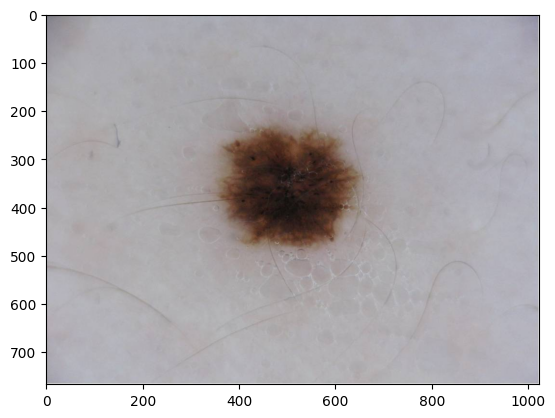

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2 as cv
from iteration_utilities import flatten

# Load an image and show it
img = cv.imread('ISIC_0000001.jpg',-1) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Color conversion
plt.imshow(img); 

In [2]:
# Use ORB to detect features
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img,None)
print(des1[0])

[ 23  68 104 202  70  82 154 200   1 192 157 162  89  94 191  96 126 193
 151 231 140   3  44 232  18  73 171 191  53 191  56  85]


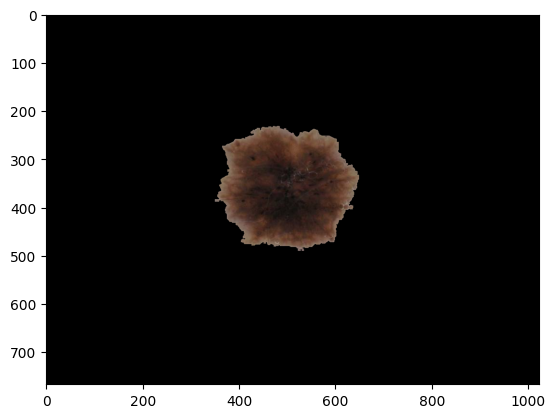

In [3]:
## Segmentation

## convert image to grayscale
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

## obtain threshold
_, thresh =  cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

## detect edges using the threshold obtained previously
edges = cv.dilate(cv.Canny(thresh,0,255),None)

## define contours in the edges
cnt = sorted(cv.findContours(edges, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2], key=cv.contourArea)[-1]

## define array for the mask
mask = np.zeros((img.shape[0],img.shape[1]), np.uint8) ## array should be the same size as the original image

## draw the contours by following the mask
masked = cv.drawContours(mask, [cnt],-1, 255, -1)

## apply bitwise_and to remove background skin and isolate the signal
segmented = cv.bitwise_and(img, img, mask=mask)
plt.imshow(segmented);

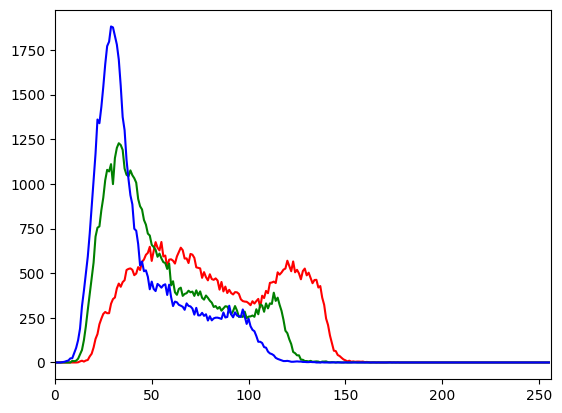

In [4]:
# color channel histogram for segmented region
color = ('r','g','b')
mode_color_channel = [] # store the most repeated pixel intensity in each channel

for i,col in enumerate(color):
    
    histr = cv.calcHist([segmented],[i],None,[256],[1,256]) # the range should be [1,256] to exclude black background
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    mode_color_channel.append(list(histr.flatten()).index(max(histr.flatten()))) 
    
plt.show()

In [5]:
avg_b = segmented[:,:,2].flatten()[segmented[:,:,2].flatten().nonzero()].mean() # average of blue channel
std_b = segmented[:,:,2].flatten()[segmented[:,:,2].flatten().nonzero()].std() # std deviation of blue channel

avg_g = segmented[:,:,1].flatten()[segmented[:,:,1].flatten().nonzero()].mean() # average of green channel
std_g = segmented[:,:,1].flatten()[segmented[:,:,1].flatten().nonzero()].std() # std deviation of blue channel

avg_r = segmented[:,:,0].flatten()[segmented[:,:,0].flatten().nonzero()].mean() # average of red channel
std_r = segmented[:,:,0].flatten()[segmented[:,:,0].flatten().nonzero()].std() # std deviation of red channel

avg_color_channel = [avg_r,avg_g,avg_b]
std_color_channel = [std_r, std_g, std_b]

In [12]:
print('Mode: Red: ' + str(mode_color_channel[0]) + ' Green: ' + str(mode_color_channel[1]) + ' Blue: ' + str(mode_color_channel[2]))
print('Average: Red: ' + str(round(avg_color_channel[0],2)) + ' Green: ' + str(round(avg_color_channel[1],2)) + ' Blue: ' + str(round(avg_color_channel[2],2)))
print('Std Dev: Red: ' + str(round(std_color_channel[0],2)) + ' Green: ' + str(round(std_color_channel[1],2)) + ' Blue: ' + str(round(std_color_channel[2],2)))


Mode: Red: 55 Green: 33 Blue: 29
Average: Red: 81.83 Green: 56.51 Blue: 45.04
Std Dev: Red: 33.92 Green: 28.62 Blue: 23.97
